In [96]:
import pandas as pd
Bachelor = pd.read_excel('/home/erq/Desktop/Documents_Enrique_Barrueco/Bachelor.xlsx')

In [231]:
#Rank subjects by grade
Ranked = Bachelor.sort_values('Grade', ascending=False)


In [232]:
Bachelor.sort_values('Grade', ascending=False)

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
41,Financial_and_Monetary_Methods_of_Economy_Regu...,6,2018-19,9.3,0,0,0,1
42,Econometrics_in_Research,4,2018-19,8.6,0,0,0,1
40,Financial_Markets,3,2018-19,8.6,0,0,0,1
37,Bachelor_Thesis,6,2018-19,8.3,0,0,0,1
33,Stochastic_Analysis_of_Financial_Risk,3,2018-19,8.3,0,0,0,1
32,Mathematical_Support_for_Financial_Decisions,4,2018-19,8.2,0,0,0,1
25,International_Economic_Organizations,6,2017-18,7.7,0,0,1,0
5,Economic_History_I,6,2015-16,7.6,1,0,0,0
11,Informatics,6,2014-15,7.6,1,0,0,0
30,Econometrics,6,2017-18,7.6,0,0,1,0


In [480]:
# Average for the 180 top ECTS credits

Ranked = Bachelor.sort_values('Grade', ascending=False)
Ranked.reset_index(inplace=True)

ECTS_Credits = 0
j = 0
Grade_Sum_Top = 0

while ECTS_Credits < 180:
    ECTS_Credits = Ranked['ECTS'][j] + ECTS_Credits
    Grade_Sum_Top = Ranked['Grade'][j] + Grade_Sum_Top
    j = j + 1
    
Avg_Top = Grade_Sum_Top/j
print("Taking the 32 subjects with the highest grade which sum to", ECTS_Credits,"my average is", Avg_Top, "out of 10" )


Taking the 32 subjects with the highest grade which sum to 180 my average is 6.80625 out of 10


In [234]:
Avg_Top

6.80625

In [477]:
#In total during my degree I have completed 246 credits
Bachelor['ECTS'].sum()

246

In [236]:
# My average grade has been 6.3604651162790695 out of 10, this is an absolute mesasure, not a relative one, 
# it is not compared to the rest of my classmates.
Bachelor['Grade'].sum()/len(Bachelor)

6.3604651162790695

In [242]:
# Lets compute the average for each academic year:

First_Year = Bachelor['Academic_Year'] == '2015-16'
Avg_First = Bachelor[First_Year]['Grade'].sum()/len(Bachelor[First_Year])

Second_Year = Bachelor['Academic_Year'] == '2016-17'
Avg_Second = Bachelor[Second_Year]['Grade'].sum()/len(Bachelor[Second_Year])

Third_Year = Bachelor['Academic_Year'] == '2017-18'
Avg_Thrid = Bachelor[Third_Year]['Grade'].sum()/len(Bachelor[Third_Year])

Fourth_Year = Bachelor['Academic_Year'] == '2018-19'
Avg_Fourth = Bachelor[Fourth_Year]['Grade'].sum()/len(Bachelor[Fourth_Year])

Average_per_Course = [Avg_First, Avg_Second, Avg_Thrid, Avg_Fourth]
Average_per_Course

[5.7, 5.666666666666667, 6.1, 7.633333333333333]

In [240]:
import matplotlib.pyplot as plt
import numpy as np

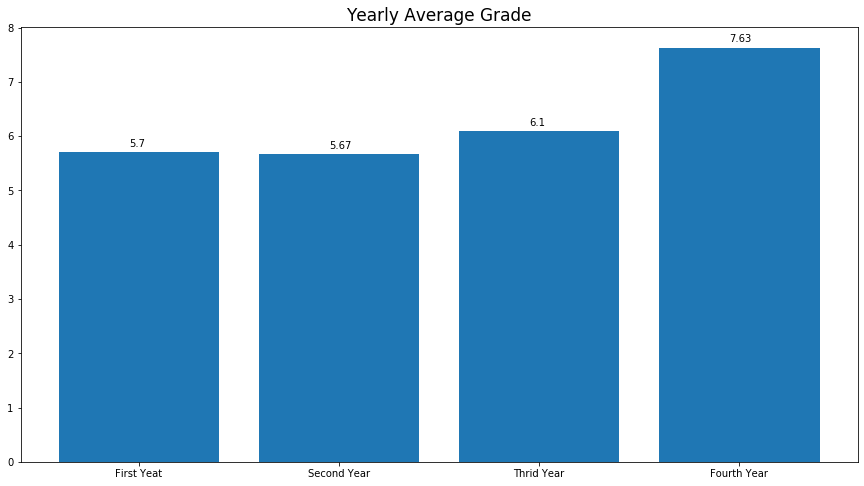

In [472]:
# Let's plot this result: 

Average_per_Course = [Avg_First, round(Avg_Second, 2), Avg_Thrid, round(Avg_Fourth, 2)]
Average_per_Course

Labels_Average_per_Course = ["First Yeat", "Second Year", "Thrid Year", "Fourth Year"]

y_pos = np.arange(len(Average_per_Course))


plt.figure(figsize=(15,8))

# Create bars
plt.bar(y_pos, Average_per_Course)
 
# Create names on the x-axis
plt.xticks(y_pos, Labels_Average_per_Course)

# Insert value on top of each bar

xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]

for i, v in enumerate(Average_per_Course):
    plt.text(xlocs[i] - 1.05, v + 0.1, str(v))

# Title

plt.title("Yearly Average Grade", fontsize=17)
    
    
 #Show graphic

plt.show()



In [425]:
# I want to clasfiffy each subject into a relevant category.

Quant_Econ = []
Mathematics = []
Finance = []
Econ = []
Stats_and_Econometrics = []
Others = []

for Subject in Bachelor['Subject']:
    
    if ('Micro' in Subject) or ('Macro' in Subject) or ('Methods' in Subject) or ('Infor' in Subject):
        Quant_Econ.append(Subject)
        #print(Subject)
        
    elif 'Math' in Subject or 'Opti' in Subject:
        Mathematics.append(Subject)
        #print(Subject)
        
    elif ('Financ' in Subject) or ('Accou' in Subject):
        Finance.append(Subject)
        #print(Subject)
    
    elif 'Econometrics' in Subject or 'Stati' in Subject:
        Stats_and_Econometrics.append(Subject)
        #print(Subject)
    
    elif ('Econ' in Subject) or ('Tax' in Subject) and (Subject not in Quant_Econ):
        Econ.append(Subject)
        #print(Subject)
    
    elif 'Thesis' in Subject:
        Thesis = Subject
        
    else:
        Others.append(Subject)

In [416]:
Stats_and_Econometrics = Bachelor["Subject"].isin([Stats_and_Econometrics][0])
Stats_and_Econometrics = Bachelor[Stats_and_Econometrics]
Stats_and_Econometrics

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
8,Statistics_I,6,2015-16,5.1,1,0,0,0
16,Statistics_II,6,2018-19,6.4,0,1,0,0
30,Econometrics,6,2017-18,7.6,0,0,1,0
35,Applied_Econometrics,6,2018-19,7.0,0,0,0,1
42,Econometrics_in_Research,4,2018-19,8.6,0,0,0,1


In [417]:
Avg_Stats_and_Econometrics = Stats_and_Econometrics['Grade'].sum()/len(Stats_and_Econometrics)
print(Avg_Stats_and_Econometrics)

6.94


In [418]:
Quant_Econ = Bachelor["Subject"].isin([Quant_Econ][0])
Quant_Econ = Bachelor[Quant_Econ]
Quant_Econ

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
0,Microeconomics_I,6,2016-17,5.5,1,0,0,0
7,Macroeconomics_I,6,2015-16,5.0,1,0,0,0
11,Informatics,6,2014-15,7.6,1,0,0,0
12,Microeconomics_II,6,2016-17,5.9,0,1,0,0
17,Microeconomics_III,6,2016-17,5.2,0,1,0,0
18,Methods_of_Applied_Economics,6,2016-17,6.1,0,1,0,0
22,Macroeconomics_II,6,2017-18,6.5,0,0,1,0
27,Macroeconomics_III,8,2017-18,5.7,0,0,1,0
31,Advanced_Macroeconomics,6,2018-19,7.3,0,0,0,1
41,Financial_and_Monetary_Methods_of_Economy_Regu...,6,2018-19,9.3,0,0,0,1


In [419]:
Avg_Quant_Econ = Quant_Econ['Grade'].sum()/len(Quant_Econ)
print(Avg_Quant_Econ)

6.409999999999999


In [420]:
Mathematics = Bachelor["Subject"].isin([Mathematics][0])
Mathematics = Bachelor[Mathematics]
Mathematics

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
2,Mathematics_I,6,2016-17,5.0,1,0,0,0
9,Mathematics_II,6,2015-16,6.1,1,0,0,0
15,Mathematics_III,6,2017-18,5.0,0,1,0,0
32,Mathematical_Support_for_Financial_Decisions,4,2018-19,8.2,0,0,0,1
34,Game_Theory_and_Dynamic_Optimization,6,2018-19,7.0,0,0,0,1


In [421]:
Avg_Mathematics = Mathematics['Grade'].sum()/len(Mathematics)
print(Avg_Mathematics)

6.26


In [422]:
Finance = Bachelor["Subject"].isin([Finance][0])
Finance = Bachelor[Finance]
Finance

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
3,Financial_Accounting,6,2015-16,5.2,1,0,0,0
14,Analytical_Accounting,6,2016-17,6.5,0,1,0,0
21,Finance,6,2016-17,6.3,0,1,0,0
29,Monetary_and_Financial_Economics,6,2016-17,5.5,0,0,1,0
33,Stochastic_Analysis_of_Financial_Risk,3,2018-19,8.3,0,0,0,1
38,Financial_Theory,6,2018-19,5.4,0,0,0,1
39,International_Corporate_Finance,4,2018-19,7.2,0,0,0,1
40,Financial_Markets,3,2018-19,8.6,0,0,0,1


In [423]:
Avg_Finance = Finance['Grade'].sum()/len(Finance)
print(Avg_Finance)

6.625


In [426]:
Econ = Bachelor["Subject"].isin([Econ][0])
Econ = Bachelor[Econ]
Econ

,Subject,ECTS,Academic_Year,Grade,First_Year,Second_Year,Third_Year,Fourth_Year
4,Business_Economics,6,2015-16,5.8,1,0,0,0
5,Economic_History_I,6,2015-16,7.6,1,0,0,0
6,Economic_Law,6,2015-16,5.0,1,0,0,0
13,World_Economy,6,2015-16,5.2,0,1,0,0
19,International_Economics,6,2015-16,6.0,0,1,0,0
20,Economic_History_II,6,2015-16,5.0,0,1,0,0
23,Public_Economics,6,2017-18,5.5,0,0,1,0
24,Spanish_Economy,6,2017-18,5.0,0,0,1,0
25,International_Economic_Organizations,6,2017-18,7.7,0,0,1,0
26,Economic_Policy,6,2017-18,6.1,0,0,1,0


In [427]:
Avg_Econ = Econ['Grade'].sum()/len(Econ)
print(Avg_Econ)

5.808333333333334


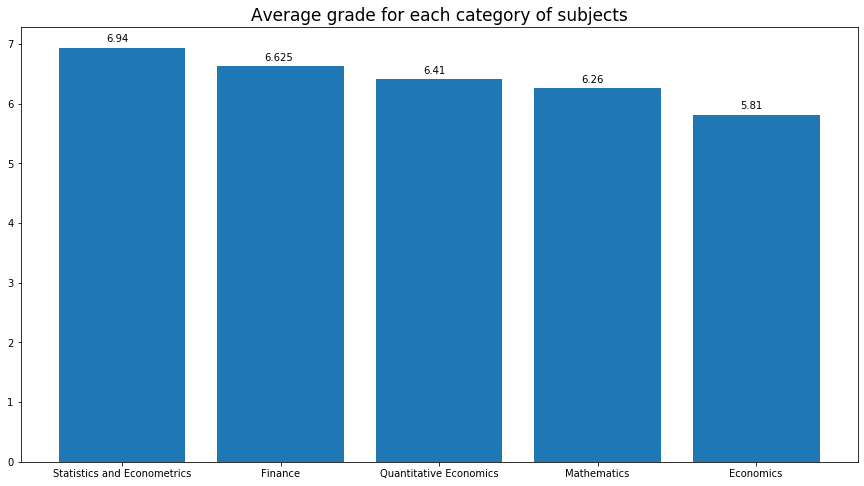

In [483]:
# Let's plot how I performed in each category of subjects
Average_Block_Subjcets = [Avg_Stats_and_Econometrics, Avg_Finance, round(Avg_Quant_Econ, 2), Avg_Mathematics, round(Avg_Econ, 2)]


Labels = ['Statistics and Econometrics','Finance', 'Quantitative Economics', 'Mathematics', 'Economics']
y_pos = np.arange(len(Average_Block_Subjcets))


plt.figure(figsize=(15,8))

# Create bars
plt.bar(y_pos, Average_Block_Subjcets)
 
# Create names on the x-axis
plt.xticks(y_pos, Labels)
# Show graphic
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]

plt.title("Average grade for each category of subjects", fontsize=17)

for i, v in enumerate(Average_Block_Subjcets):
    plt.text(xlocs[i] - 1.1, v + 0.1, str(v))
    
plt.show()
